<a href="https://colab.research.google.com/github/guptaru1/StockPrediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


try:
    import yahoo_fin.stock_info as si
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        !pip install yahoo_fin
    import yahoo_fin.stock_info as si
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
mutation_prob = 0.2
crossover_prob = 0.8
initial_population = 100
generations = 150
rsi_threshold = 30
ema_weight = 0.8


def pre_process(stock_data):
  data = stock_data[["close"]]
  data = data.rename(columns= {'close': 'actualclose'})
  #this is so that we can see which is higer or above in the stock
  #data["Target"] = stock_data.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Actual_Close"]
  data['Target'] = (data['actualclose'] > data['actualclose'].shift(1)).astype(int)
  stock_data_copy = stock_data.copy()
  stock_data_shifted = stock_data_copy.shift(1)

  #combine training data
  predictors = ["close", "volume", "open", "high", "low"]
  data = data.join(stock_data_shifted[predictors]).iloc[1:]

  return data


#calculate simple moving average using %d which is usually a 3 day period
def calculate_stochastic_oscillator(data, k_period=14, d_period=3):
    # Calculate %K
    data['Lowest Low'] = data['low'].rolling(window=k_period).min()
    data['Highest High'] = data['high'].rolling(window=k_period).max()
    data['%K'] = ((data['close'] - data['Lowest Low']) / (data['Highest High'] - data['Lowest Low'])) * 100
    # Calculate %D (3-period SMA of %K)
    data['%D'] = data['%K'].rolling(window=d_period).mean()
    # Drop auxiliary columns
    data.drop(['Lowest Low', 'Highest High'], axis=1, inplace=True)
    return data[['%K', '%D']]


def calculate_features(data):
    close_prices = data['close']
    #rsi
    #rsi = talib.RSI(close_prices, timeperiod=14)
    #calcualte ema
    #sma for a 200 period
    data["200day"] = data["close"].rolling(200).mean()

    #sma for a 50 day period
    data["50day"] = data["close"].rolling(50).mean()
    print("new features")
    print(data.head(5))



def sharpe_ratio(weights, data):
  data_returns = np.log(data) - np.log(data.shift(1))
  data_returns = data_returns.dropna()

  portfolio_returns = np.dot(data_returns, weights)
  portfolio_mean = np.mean(portfolio_returns)
  portfolio_std = np.std(portfolio_returns)
  sharpe_ratio = (portfolio_mean / portfolio_std) * np.sqrt(252)
  return sharpe_ratio


# Scrape stock data from Yahoo Finance

stock_data = si.get_data("AAPL")
'''
stock_data = si.download('AAPL',
                      start='2010-01-01',
                      end='2021-06-12',
                      progress=False,
)
'''


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 973.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.2 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=b5dd393220cd46ca9cb6621029998110e339946d01a37c72d3ff678885287ddc
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=0d84b2fd00f0e47d70f64015d9ca75c984a38f7b51beae55b666d5e03cfbec0b
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exis

"\nstock_data = si.download('AAPL',\n                      start='2010-01-01',\n                      end='2021-06-12',\n                      progress=False,\n)\n"

In [3]:
#calculate simple moving average using %d which is usually a 3 day period
def calculate_stochastic_oscillator(data, k_period=14, d_period=3):
    # Calculate %K
    data['Lowest Low'] = data['low'].rolling(window=k_period).min()
    data['Highest High'] = data['high'].rolling(window=k_period).max()
    data['%K'] = ((data['close'] - data['Lowest Low']) / (data['Highest High'] - data['Lowest Low'])) * 100
    # Calculate %D (3-period SMA of %K)
    data['%D'] = data['%K'].rolling(window=d_period).mean()
    # Drop auxiliary columns
    data.drop(['Lowest Low', 'Highest High'], axis=1, inplace=True)
    return data[['%K', '%D']]


def esa(data):
    close_prices = data['close']
    #rsi
    #rsi = talib.RSI(close_prices, timeperiod=14)
    #calcualte ema
    #sma for a 200 period
    data["200day"] = data["close"].rolling(200).mean()
    #sma for a 50 day period
    data["50day"] = data["close"].rolling(50).mean()



def sharpe_ratio(weights, data):
  data_returns = np.log(data) - np.log(data.shift(1))
  data_returns = data_returns.dropna()

  portfolio_returns = np.dot(data_returns, weights)
  portfolio_mean = np.mean(portfolio_returns)
  portfolio_std = np.std(portfolio_returns)
  sharpe_ratio = (portfolio_mean / portfolio_std) * np.sqrt(252)
  return sharpe_ratio


def calculate_features(processed_data):
  esa(processed_data)
  calculate_stochastic_oscillator(processed_data)



processed_data = pre_process(stock_data)
calculate_features(processed_data)
print("new features")
processed_data  = processed_data.dropna()
print(processed_data.head())

new features
            actualclose  Target     close      volume      open      high  \
1981-09-29     0.067522       1  0.064174  91728000.0  0.064174  0.064732   
1981-09-30     0.068080       1  0.067522  94684800.0  0.067522  0.068080   
1981-10-01     0.068080       0  0.068080  49996800.0  0.068080  0.068638   
1981-10-02     0.073661       1  0.068080  61129600.0  0.068080  0.068638   
1981-10-05     0.075893       1  0.073661  45046400.0  0.073661  0.074219   

                 low    200day     50day         %K         %D  
1981-09-29  0.064174  0.118125  0.094687   2.173729   0.724576  
1981-09-30  0.067522  0.117821  0.093884  15.216193   5.796641  
1981-10-01  0.068080  0.117553  0.093103  18.180340  11.856754  
1981-10-02  0.068080  0.117330  0.092444  20.511883  17.969472  
1981-10-05  0.073661  0.117120  0.091841  51.431064  30.041096  


In [18]:
#implement the genetic algorithm
try:
  from sklearn.model_selection import train_test_split
except:
  !pip install -U scikit-learn
  from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import random
import warnings
from tqdm import tqdm
import time

# Filter out the specific UserWarning from scikit-learn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.base")



class Chromosome():
  def __init__(self, num_features, gene):

      print("Generated genes:", gene)
      #np array
      self.genes = gene



class Population():
  def __init__(self, population_size,dataset, num_features =4 ):
      #generates our initial population -> rep of 1,0 for what feature to include and what not to
      self.population = []
      self.dataset = dataset
      self.max_fitness = 0
      self.num_features = num_features
      self.best_solution = None
      self.population_size = population_size
      self.gene_length = num_features
      self.init_pop()


  #generate init population
  def init_pop(self):
      seed_counter = 0
      for i in range(self.population_size):
            # Use a unique seed for each chromosome
            seed = int(time.time()) + seed_counter
            np.random.seed(seed)

            self.population.append(Chromosome(self.num_features, np.random.randint(2, size=self.num_features)))

            # Increment the counter for the next chromosome
            seed_counter += 1

  def evaluate_fitness(self, chromosome):
        # Create a simple dataset for demonstration purposes
        X, y = self.dataset[["200day", "50day", "%K", "%D"]], self.dataset['Target']
        print("My chromosome value", chromosome.genes)
        # Select features based on the chromosome
        selected_features = [i for i in range(self.num_features) if chromosome.genes[i] == 1]
        if not selected_features:
            return 0
        X_selected = X.iloc[:, selected_features]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=None)
        #print("MY TRAINING DATA", X_train.values)
        # Train a model and evaluate accuracy
        model = RandomForestClassifier()
        model.fit(X_train.values, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print("my accuracy", accuracy)
        mse = mean_squared_error(y_test, y_pred)
        return 1 / mse


  def mutation(self, individual, mutation_prob = 0.2):
        print(type(individual), individual, "Testing")
        for i in range(self.gene_length):
            if random.random() < mutation_prob:
                individual.genes[i] = 1 - individual.genes[i]

  def chromosome(self, parent1, parent2):
    crossover_point = random.randint(1, min(len(parent1.genes), len(parent2.genes)) - 1)
    print("The two paernt", parent1, parent2)
    print("New child chromosme 1", parent1.genes[:crossover_point])
    print("New child chromosome 2", parent2.genes[crossover_point:])
    child_chromosome = np.concatenate((parent1.genes[:crossover_point], parent2.genes[crossover_point:]))
    new_child = Chromosome(4, child_chromosome)
    return new_child


  def evolve(self, generations=50, elitisim_size = 10):
    losses = []
    for generation in tqdm(range(generations), desc="Generations"):
      fitness_scores = [self.evaluate_fitness(chrom) for chrom in self.population]
      best_index = np.argmin(fitness_scores)
      best_chromosome = self.population[best_index]
      best_fitness_val = fitness_scores[best_index]
      losses.append(best_fitness_val)
      print(f"generation {generation}")
      if best_fitness_val > self.max_fitness:
        #update crossover to use what features gave the best fitness and keep those binary digists fixed anad change other parts or do this for mutation as well
        self.max_fitness = best_fitness_val
        self.best_solution = best_chromosome
        print(f"Generation {generation+1}: Best Fitness = {best_fitness_val}")

      elite_population = sorted(self.population, key=lambda x: self.evaluate_fitness(x), reverse=True)[:elitisim_size]

            # Genetic operations: Crossover and Mutation
      new_population = elite_population.copy()
      for _ in range((self.population_size - elitisim_size) // 2):
                print("testing this loop")
                parent1, parent2 = random.sample(elite_population, 2)
                child1 = self.chromosome(parent1, parent2)
                child2 = self.chromosome(parent2, parent1)

                self.mutation(child1)
                self.mutation(child2)

                new_population.extend([child1, child2])

      self.population = new_population
    return losses

if __name__ == "__main__":
    pop = Population(population_size=15, num_features=4, dataset=processed_data)
    losses = pop.evolve(generations=20)

    # Plot the error minimization curve
    #plt.plot(range(1, (50) + 1), losses)
    #plt.title('Genetic Algorithm - Error Minimization Curve')
    #plt.xlabel('Generation')
    #plt.ylabel('Best Fitness Value')
   # plt.show()

Generated genes: [0 0 0 1]
Generated genes: [0 0 1 1]
Generated genes: [0 0 0 0]
Generated genes: [0 0 1 1]
Generated genes: [1 1 0 0]
Generated genes: [1 0 0 0]
Generated genes: [1 1 0 0]
Generated genes: [0 0 1 0]
Generated genes: [1 1 1 1]
Generated genes: [1 1 1 1]
Generated genes: [1 1 0 1]
Generated genes: [0 1 1 1]
Generated genes: [0 0 1 1]
Generated genes: [0 0 0 0]
Generated genes: [0 0 1 1]


Generations:   0%|          | 0/20 [00:00<?, ?it/s]

My chromosome value [0 0 0 1]
my accuracy 0.49600376116596145
My chromosome value [0 0 1 1]
my accuracy 0.4767277856135402
My chromosome value [0 0 0 0]
My chromosome value [0 0 1 1]
my accuracy 0.5021156558533145
My chromosome value [1 1 0 0]
my accuracy 0.4978843441466855
My chromosome value [1 0 0 0]
my accuracy 0.5035260930888575
My chromosome value [1 1 0 0]
my accuracy 0.5190409026798307
My chromosome value [0 0 1 0]
my accuracy 0.48707099200752235
My chromosome value [1 1 1 1]
my accuracy 0.5133991537376587
My chromosome value [1 1 1 1]
my accuracy 0.5148095909732017
My chromosome value [1 1 0 1]
my accuracy 0.5260930888575458
My chromosome value [0 1 1 1]
my accuracy 0.4922425952045134
My chromosome value [0 0 1 1]
my accuracy 0.49694405265632347
My chromosome value [0 0 0 0]
My chromosome value [0 0 1 1]
my accuracy 0.48613070051716034
generation 0
My chromosome value [0 0 0 1]
my accuracy 0.48848142924306537
My chromosome value [0 0 1 1]
my accuracy 0.4913023037141514
My chro

Generations:   5%|▌         | 1/20 [01:13<23:24, 73.92s/it]

my accuracy 0.4894217207334274
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc8610> <__main__.Chromosome object at 0x7b054ce759f0>
New child chromosme 1 [0 1 1]
New child chromosome 2 [0]
Generated genes: [0 1 1 0]
The two paernt <__main__.Chromosome object at 0x7b054ce759f0> <__main__.Chromosome object at 0x7b054acc8610>
New child chromosme 1 [0 0]
New child chromosome 2 [1 1]
Generated genes: [0 0 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce74670> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acc9630> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc8610> <__main__.Chromosome object at 0x7b054ce76e30>
New child chromosme 1 [0 1 1]
New child chromosome 2 [1]
Generated genes: [0 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054ce76e30> <__main__.Chromosome object at 0x7b054acc8610>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [

Generations:  10%|█         | 2/20 [02:29<22:32, 75.16s/it]

my accuracy 0.4917724494593324
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce759c0> <__main__.Chromosome object at 0x7b054ce760b0>
New child chromosme 1 [1 1 0]
New child chromosome 2 [0]
Generated genes: [1 1 0 0]
The two paernt <__main__.Chromosome object at 0x7b054ce760b0> <__main__.Chromosome object at 0x7b054ce759c0>
New child chromosme 1 [1 0]
New child chromosome 2 [0 0]
Generated genes: [1 0 0 0]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68f2b0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68f0d0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce77370> <__main__.Chromosome object at 0x7b054acc96f0>
New child chromosme 1 [0 0]
New child chromosome 2 [1 1]
Generated genes: [0 0 1 1]
The two paernt <__main__.Chromosome object at 0x7b054acc96f0> <__main__.Chromosome object at 0x7b054ce77370>
New child chromosme 1 [1]
New child chromosome 2 [0 1 1]
Generated genes: [

Generations:  15%|█▌        | 3/20 [03:49<21:52, 77.20s/it]

my accuracy 0.5143394452280207
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce760b0> <__main__.Chromosome object at 0x7b054acc8610>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054acc8610> <__main__.Chromosome object at 0x7b054ce760b0>
New child chromosme 1 [0]
New child chromosome 2 [0 0 0]
Generated genes: [0 0 0 0]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99d1e0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99f2e0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc8610> <__main__.Chromosome object at 0x7b054e68f0d0>
New child chromosme 1 [0 1]
New child chromosome 2 [0 0]
Generated genes: [0 1 0 0]
The two paernt <__main__.Chromosome object at 0x7b054e68f0d0> <__main__.Chromosome object at 0x7b054acc8610>
New child chromosme 1 [1 0]
New child chromosome 2 [1 1]
Generated genes: [

Generations:  20%|██        | 4/20 [05:07<20:38, 77.41s/it]

my accuracy 0.5039962388340385
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99d1e0> <__main__.Chromosome object at 0x7b054acc96f0>
New child chromosme 1 [1 1 0]
New child chromosome 2 [1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acc96f0> <__main__.Chromosome object at 0x7b054d99d1e0>
New child chromosme 1 [1 1 1]
New child chromosome 2 [0]
Generated genes: [1 1 1 0]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b059d7facb0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054accb310> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99fc40> <__main__.Chromosome object at 0x7b054accb730>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054accb730> <__main__.Chromosome object at 0x7b054d99fc40>
New child chromosme 1 [1 1]
New child chromosome 2 [1 1]
Generated genes: [

Generations:  25%|██▌       | 5/20 [06:26<19:31, 78.12s/it]

my accuracy 0.5011753643629525
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99fc40> <__main__.Chromosome object at 0x7b059d7facb0>
New child chromosme 1 [1 1 1]
New child chromosome 2 [1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b059d7facb0> <__main__.Chromosome object at 0x7b054d99fc40>
New child chromosme 1 [1 1]
New child chromosome 2 [1 1]
Generated genes: [1 1 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b059d7fbb20> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce772e0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc96f0> <__main__.Chromosome object at 0x7b054ce77370>
New child chromosme 1 [1 1 1]
New child chromosome 2 [1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054ce77370> <__main__.Chromosome object at 0x7b054acc96f0>
New child chromosme 1 [0 0]
New child chromosome 2 [1 1]
Generated genes: [

Generations:  30%|███       | 6/20 [07:47<18:26, 79.02s/it]

my accuracy 0.5072872590503056
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accba30> <__main__.Chromosome object at 0x7b054ce77370>
New child chromosme 1 [1 0 0]
New child chromosome 2 [1]
Generated genes: [1 0 0 1]
The two paernt <__main__.Chromosome object at 0x7b054ce77370> <__main__.Chromosome object at 0x7b054accba30>
New child chromosme 1 [0]
New child chromosome 2 [0 0 1]
Generated genes: [0 0 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce77340> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99fca0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b059d7fbb20> <__main__.Chromosome object at 0x7b054ce772e0>
New child chromosme 1 [1 1 1]
New child chromosome 2 [1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054ce772e0> <__main__.Chromosome object at 0x7b059d7fbb20>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [

Generations:  35%|███▌      | 7/20 [09:07<17:11, 79.35s/it]

my accuracy 0.5002350728725905
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accbd00> <__main__.Chromosome object at 0x7b054accba30>
New child chromosme 1 [1]
New child chromosome 2 [0 0 1]
Generated genes: [1 0 0 1]
The two paernt <__main__.Chromosome object at 0x7b054accba30> <__main__.Chromosome object at 0x7b054accbd00>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [1 1 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99cca0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acc9f60> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99fc40> <__main__.Chromosome object at 0x7b054accbd00>
New child chromosme 1 [1 1 1]
New child chromosome 2 [1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054accbd00> <__main__.Chromosome object at 0x7b054d99fc40>
New child chromosme 1 [1 1]
New child chromosome 2 [1 1]
Generated genes: [

Generations:  40%|████      | 8/20 [10:28<15:58, 79.87s/it]

my accuracy 0.5049365303244006
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accba30> <__main__.Chromosome object at 0x7b054d99fc40>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054d99fc40> <__main__.Chromosome object at 0x7b054accba30>
New child chromosme 1 [1 1 1]
New child chromosome 2 [1]
Generated genes: [1 1 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce774f0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99fac0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b059d7fbb20> <__main__.Chromosome object at 0x7b054d99fc40>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054d99fc40> <__main__.Chromosome object at 0x7b059d7fbb20>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [

Generations:  45%|████▌     | 9/20 [11:47<14:34, 79.53s/it]

my accuracy 0.5105782792665726
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accbd00> <__main__.Chromosome object at 0x7b054d99d1e0>
New child chromosme 1 [1 1 1]
New child chromosome 2 [0]
Generated genes: [1 1 1 0]
The two paernt <__main__.Chromosome object at 0x7b054d99d1e0> <__main__.Chromosome object at 0x7b054accbd00>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [1 1 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99f760> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99e170> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce772e0> <__main__.Chromosome object at 0x7b054d99cca0>
New child chromosme 1 [1]
New child chromosome 2 [0 1 0]
Generated genes: [1 0 1 0]
The two paernt <__main__.Chromosome object at 0x7b054d99cca0> <__main__.Chromosome object at 0x7b054ce772e0>
New child chromosme 1 [1 0 1]
New child chromosome 2 [1]
Generated genes: [

Generations:  50%|█████     | 10/20 [13:05<13:12, 79.24s/it]

my accuracy 0.5119887165021156
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accbd00> <__main__.Chromosome object at 0x7b054d99d1e0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 0]
Generated genes: [1 1 0 0]
The two paernt <__main__.Chromosome object at 0x7b054d99d1e0> <__main__.Chromosome object at 0x7b054accbd00>
New child chromosme 1 [1 1 0]
New child chromosome 2 [1]
Generated genes: [1 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68ca90> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68f7c0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99cca0> <__main__.Chromosome object at 0x7b054acca9b0>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054acca9b0> <__main__.Chromosome object at 0x7b054d99cca0>
New child chromosme 1 [1 1]
New child chromosome 2 [1 0]
Generated genes: [

Generations:  55%|█████▌    | 11/20 [14:25<11:53, 79.32s/it]

my accuracy 0.5086976962858486
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99d1e0> <__main__.Chromosome object at 0x7b054acca9b0>
New child chromosme 1 [1 1]
New child chromosome 2 [1 1]
Generated genes: [1 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054acca9b0> <__main__.Chromosome object at 0x7b054d99d1e0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 0]
Generated genes: [1 1 0 0]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acc8910> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054accbc40> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc88e0> <__main__.Chromosome object at 0x7b054e68c3d0>
New child chromosme 1 [0 1 0]
New child chromosome 2 [1]
Generated genes: [0 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054e68c3d0> <__main__.Chromosome object at 0x7b054acc88e0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 0]
Generated genes: [

Generations:  60%|██████    | 12/20 [15:44<10:33, 79.24s/it]

my accuracy 0.5011753643629525
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accbc40> <__main__.Chromosome object at 0x7b054ce772e0>
New child chromosme 1 [0 1]
New child chromosome 2 [0 1]
Generated genes: [0 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054ce772e0> <__main__.Chromosome object at 0x7b054accbc40>
New child chromosme 1 [1 1 0]
New child chromosome 2 [0]
Generated genes: [1 1 0 0]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99df90> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce758d0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce759f0> <__main__.Chromosome object at 0x7b054e68f7c0>
New child chromosme 1 [0 1]
New child chromosome 2 [0 0]
Generated genes: [0 1 0 0]
The two paernt <__main__.Chromosome object at 0x7b054e68f7c0> <__main__.Chromosome object at 0x7b054ce759f0>
New child chromosme 1 [1 1 0]
New child chromosome 2 [1]
Generated genes: [

Generations:  65%|██████▌   | 13/20 [16:58<09:03, 77.64s/it]

my accuracy 0.5148095909732017
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99fac0> <__main__.Chromosome object at 0x7b054ce77340>
New child chromosme 1 [0]
New child chromosome 2 [1 1 1]
Generated genes: [0 1 1 1]
The two paernt <__main__.Chromosome object at 0x7b054ce77340> <__main__.Chromosome object at 0x7b054d99fac0>
New child chromosme 1 [0]
New child chromosome 2 [1 1 1]
Generated genes: [0 1 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99cca0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acc9090> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce772e0> <__main__.Chromosome object at 0x7b054ce758d0>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054ce758d0> <__main__.Chromosome object at 0x7b054ce772e0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [

Generations:  70%|███████   | 14/20 [18:08<07:31, 75.24s/it]

my accuracy 0.5190409026798307
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99cca0> <__main__.Chromosome object at 0x7b054acc99c0>
New child chromosme 1 [0 1 1]
New child chromosome 2 [0]
Generated genes: [0 1 1 0]
The two paernt <__main__.Chromosome object at 0x7b054acc99c0> <__main__.Chromosome object at 0x7b054d99cca0>
New child chromosme 1 [1 1]
New child chromosome 2 [1 1]
Generated genes: [1 1 1 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99cbe0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99fa30> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce758d0> <__main__.Chromosome object at 0x7b054acc9d80>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acc9d80> <__main__.Chromosome object at 0x7b054ce758d0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [

Generations:  75%|███████▌  | 15/20 [19:14<06:03, 72.69s/it]

my accuracy 0.5063469675599436
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc9d80> <__main__.Chromosome object at 0x7b054d99fa30>
New child chromosme 1 [1 1 0]
New child chromosome 2 [0]
Generated genes: [1 1 0 0]
The two paernt <__main__.Chromosome object at 0x7b054d99fa30> <__main__.Chromosome object at 0x7b054acc9d80>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce76e30> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99c700> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99cca0> <__main__.Chromosome object at 0x7b054acc9d80>
New child chromosme 1 [0 1]
New child chromosome 2 [0 1]
Generated genes: [0 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acc9d80> <__main__.Chromosome object at 0x7b054d99cca0>
New child chromosme 1 [1 1]
New child chromosome 2 [1 1]
Generated genes: [

Generations:  80%|████████  | 16/20 [20:21<04:43, 70.80s/it]

my accuracy 0.5063469675599436
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acc9d80> <__main__.Chromosome object at 0x7b054e68f070>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054e68f070> <__main__.Chromosome object at 0x7b054acc9d80>
New child chromosme 1 [0 1 0]
New child chromosome 2 [1]
Generated genes: [0 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acc8ee0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acc94b0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce772e0> <__main__.Chromosome object at 0x7b054d99fa30>
New child chromosme 1 [1]
New child chromosome 2 [1 1 0]
Generated genes: [1 1 1 0]
The two paernt <__main__.Chromosome object at 0x7b054d99fa30> <__main__.Chromosome object at 0x7b054ce772e0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [

Generations:  85%|████████▌ | 17/20 [21:29<03:30, 70.05s/it]

my accuracy 0.5152797367183827
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acca5f0> <__main__.Chromosome object at 0x7b054acc9570>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acc9570> <__main__.Chromosome object at 0x7b054acca5f0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [1 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99c670> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054d99f9d0> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acca9b0> <__main__.Chromosome object at 0x7b054acc9570>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acc9570> <__main__.Chromosome object at 0x7b054acca9b0>
New child chromosme 1 [1]
New child chromosome 2 [1 1 1]
Generated genes: [

Generations:  90%|█████████ | 18/20 [22:41<02:21, 70.52s/it]

my accuracy 0.5002350728725905
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054acca1d0> <__main__.Chromosome object at 0x7b054acc9d80>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acc9d80> <__main__.Chromosome object at 0x7b054acca1d0>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68dc30> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054ce76440> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054ce772e0> <__main__.Chromosome object at 0x7b054acca1d0>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054acca1d0> <__main__.Chromosome object at 0x7b054ce772e0>
New child chromosme 1 [1 1 0]
New child chromosome 2 [1]
Generated genes: [

Generations:  95%|█████████▌| 19/20 [23:47<01:09, 69.31s/it]

my accuracy 0.4922425952045134
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99d120> <__main__.Chromosome object at 0x7b054d99f9d0>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054d99f9d0> <__main__.Chromosome object at 0x7b054d99d120>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [1 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b059d7fbb20> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054acca260> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99d120> <__main__.Chromosome object at 0x7b054d99f9d0>
New child chromosme 1 [1 1 0]
New child chromosome 2 [1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054d99f9d0> <__main__.Chromosome object at 0x7b054d99d120>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [

Generations: 100%|██████████| 20/20 [24:53<00:00, 74.69s/it]

my accuracy 0.5312646920545369
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054accb1f0> <__main__.Chromosome object at 0x7b054d99d120>
New child chromosme 1 [1 1]
New child chromosome 2 [0 1]
Generated genes: [1 1 0 1]
The two paernt <__main__.Chromosome object at 0x7b054d99d120> <__main__.Chromosome object at 0x7b054accb1f0>
New child chromosme 1 [1]
New child chromosome 2 [1 0 1]
Generated genes: [1 1 0 1]
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68faf0> Testing
<class '__main__.Chromosome'> <__main__.Chromosome object at 0x7b054e68d960> Testing
testing this loop
The two paernt <__main__.Chromosome object at 0x7b054d99f9d0> <__main__.Chromosome object at 0x7b054ce76e30>
New child chromosme 1 [1 0 0]
New child chromosome 2 [1]
Generated genes: [1 0 0 1]
The two paernt <__main__.Chromosome object at 0x7b054ce76e30> <__main__.Chromosome object at 0x7b054d99f9d0>
New child chromosme 1 [0]
New child chromosome 2 [0 0 1]
Generated genes: [

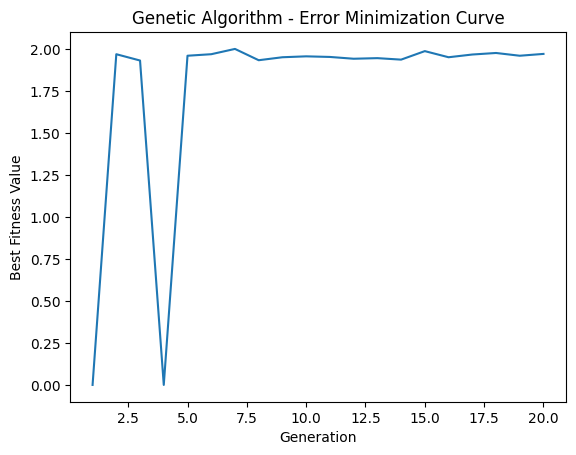

In [19]:
    # Plot the error minimization curve
plt.plot(range(1, (20) + 1), losses)
plt.title('Genetic Algorithm - Error Minimization Curve')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.show()